In [2]:
# adding more and more layers is time consuming and ineffective
import torch
from torch import nn
import torchvision.datasets as torch_data
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [3]:
class Net(nn.Module):
    def __init__(self, layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()
        for input_size, output_size in zip(layers[:-1], layers[1:]):
            self.hidden.append(nn.Linear(input_size, output_size))

    def forward(self, activation):
        l = len(self.hidden)
        activation_function = nn.SiLU()
        for (i, layer) in enumerate(self.hidden):
            if i < l - 1:
                activation = activation_function(layer(activation))
            else:
                activation = layer(activation)
        return activation

In [4]:
train_data = torch_data.MNIST(root="./data", train=True, download=True, transform=transforms.ToTensor())
validation_data = torch_data.MNIST(root="./data", train=False, download=True, transform=transforms.ToTensor())

In [5]:
train_loader = DataLoader(train_data, batch_size=128)
validation_loader = DataLoader(validation_data, batch_size=5000)

In [6]:
criterion = nn.CrossEntropyLoss()

In [7]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=5):
    metrics = {
        "training_loss": [],
        "validation_accuracy": []
    }
    for epoch in range(epochs):
        print(f"########## Starting epoch {epoch + 1} ##########")
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            y_hat = model(x.view(-1, 28 * 28))
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()

        metrics["training_loss"].append(loss.item())
        print(f"Train epoch {epoch + 1} finished.")
        print(f"\tTrain Loss: {loss.item()}")

        correct = 0
        for x, y in validation_loader:
            y_hat = model(x.view(-1, 28 * 28))
            _, label = torch.max(y_hat, 1)
            correct += (label == y).sum().item()
        acc = 100 * (correct / len(validation_data))

        metrics["validation_accuracy"].append(acc)
        print(f"\tValidation Acc: {acc}")

    return metrics

In [8]:
layers = [784, 64, 64, 64, 10]
model = Net(layers)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train_metrics = train(model, criterion, train_loader, validation_loader, optimizer, epochs=20)

########## Starting epoch 1 ##########
Train epoch 1 finished.
	Train Loss: 0.2942415773868561
	Validation Acc: 91.97
########## Starting epoch 2 ##########
Train epoch 2 finished.
	Train Loss: 0.24723078310489655
	Validation Acc: 93.64
########## Starting epoch 3 ##########
Train epoch 3 finished.
	Train Loss: 0.22591398656368256
	Validation Acc: 94.78
########## Starting epoch 4 ##########
Train epoch 4 finished.
	Train Loss: 0.206899955868721
	Validation Acc: 95.28
########## Starting epoch 5 ##########
Train epoch 5 finished.
	Train Loss: 0.18519772589206696
	Validation Acc: 95.78
########## Starting epoch 6 ##########
Train epoch 6 finished.
	Train Loss: 0.1735905557870865
	Validation Acc: 96.41999999999999
########## Starting epoch 7 ##########
Train epoch 7 finished.
	Train Loss: 0.17251108586788177
	Validation Acc: 96.84
########## Starting epoch 8 ##########
Train epoch 8 finished.
	Train Loss: 0.17376869916915894
	Validation Acc: 96.97
########## Starting epoch 9 ##########
T

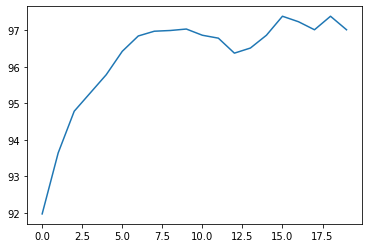

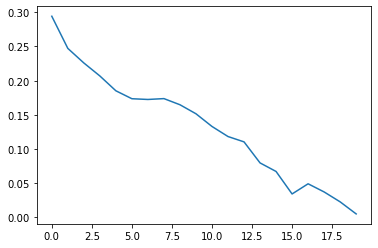

In [9]:
# plot the data
plt.plot(train_metrics["validation_accuracy"], label="Accuracy")
plt.show()
plt.plot(train_metrics["training_loss"], label="Loss")
plt.show()